In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import seaborn as sns

## Import the Data of Each Coefficients File

In [3]:
fileList = glob.glob("Coefficient_Outputs\\*.xlsx")

### Compile a master file using all the outputs

In [4]:
# Holding Lists
count = 0
features = []
coefs = []
versions = []
# Iterate through the files
for file in fileList:
    count += 1
    data = pd.read_excel(file)
    # Iterate through the lines of each file
    for index, row in data.iterrows():
        index, feature, coef = row
        # Append values
        features.append(feature)
        coefs.append(coef)
        versions.append('v%i'%count)
# Generate master coefficients dataframe
df = pd.DataFrame()
df['Feature'] = features
df['Coefficient'] = coefs
df['Version'] = versions
df

,Feature,Coefficient,Version
0,Param9-1 [U5],3.193473,v1
1,"Param9-1, min. [U5]",1.900022,v1
2,Param1 [U1],1.458166,v1
3,"Param2, raw [U2]",1.441925,v1
4,"Param10, OP [U2]",1.437046,v1
...,...,...,...
1052,Param9-2 [U5],-1.345236,v7
1053,Channel_Channel7,-1.345610,v7
1054,Param9-4 [U5],-1.489163,v7
1055,Channel2_Channel216,-2.274743,v7


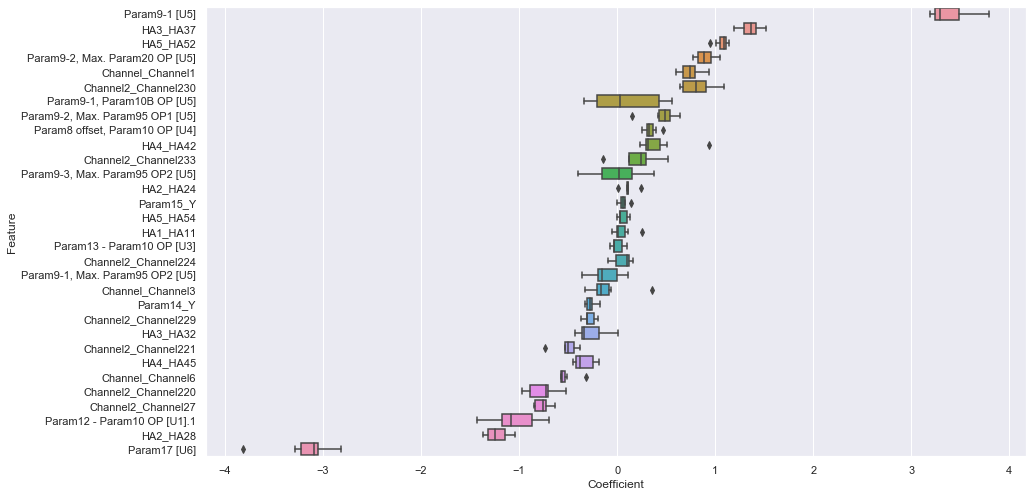

In [16]:
# Get the unique names of features and take every 5th entry
subsetParams_ = df.Feature.unique()
subsetParams = subsetParams_[::5]
# Subset the dataframe for presentation
df_ = df[df['Feature'].isin(subsetParams)]
sns_fig = sns.boxplot(x=df_["Coefficient"], y=df_["Feature"])
# Adjust figure size to show data
sns.set(rc={'figure.figsize':(13.7,8.27)})
#plt.savefig('Plots/Coefficient_Boxplots.png')

The boxplot of coefficient values, each box corresponding to 7 iterations, indicates that only a handful of parameters have a significant influence over the final assembled product performance. While the methodology of taking every 5th entry means that some other influential parameters are excluded it stil indicates that most parameters are comparatively unimportant. 

In particular, the wide boxes near 0 and the very tight boxes around 0 are strong contenders to be dismissed as they have an indistinguishable relationship to the performance.

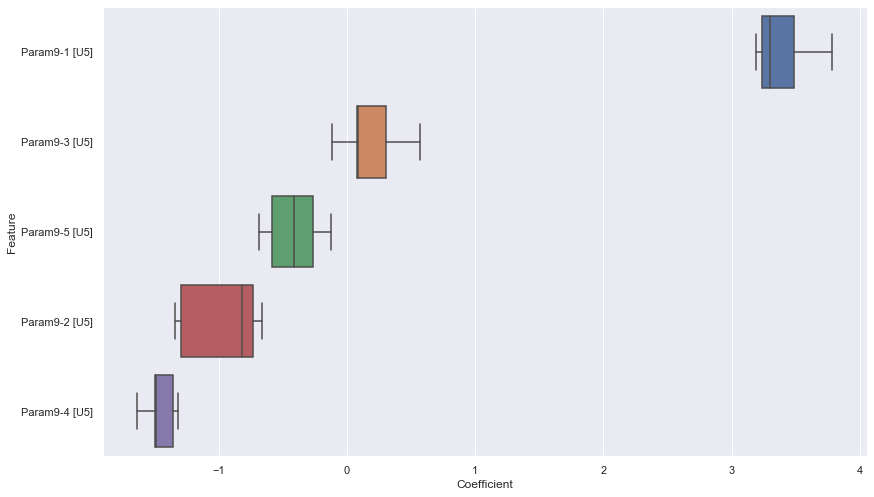

In [18]:
# Get the unique names of features and take just Param9
subsetParams_ = df.Feature.unique()
subsetParams = ['Param9-1 [U5]', 'Param9-2 [U5]', 'Param9-3 [U5]', 'Param9-4 [U5]', 'Param9-5 [U5]']
# Subset the dataframe for presentation
df_ = df[df['Feature'].isin(subsetParams)]
sns.boxplot(x=df_["Coefficient"], y=df_["Feature"])
# Adjust figure size to show data
sns.set(rc={'figure.figsize':(13.7,8.27)})
#plt.savefig('Plots/Param9_Boxplots.png')

Subsetting the data to only Param9 it shows that in terms of magnitude only the first element is really worth considering. This is a particularly interesting result that shows down-sampling may be worthwhile. The change in +/- sign may indicate something about the manner in which the tests are performed being interdependent or otherwise coupled.